# DTEK0042 Exercise 2
    Group Members:
    1. Niko Itänen
    2. Tea Suovuori

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

Text(0.5, 1.0, 'ECG signal')

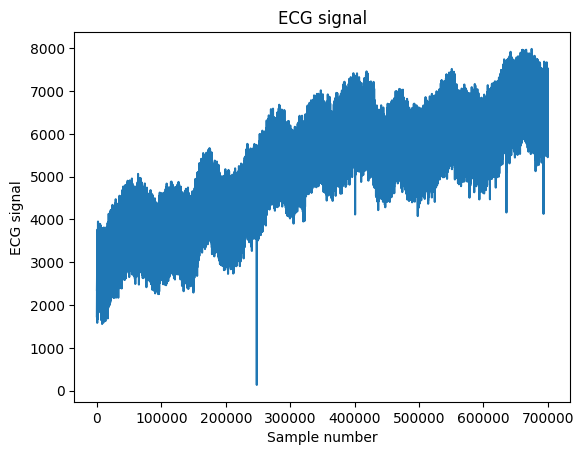

In [2]:
# Import ECG signal from data directory
ECG_sig = np.loadtxt('data/ECG_800hz.txt')

# Plot the ECG signal
plt.plot(ECG_sig)

# Label the axes
plt.xlabel('Sample number')
plt.ylabel('ECG signal')
plt.title('ECG signal')

# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

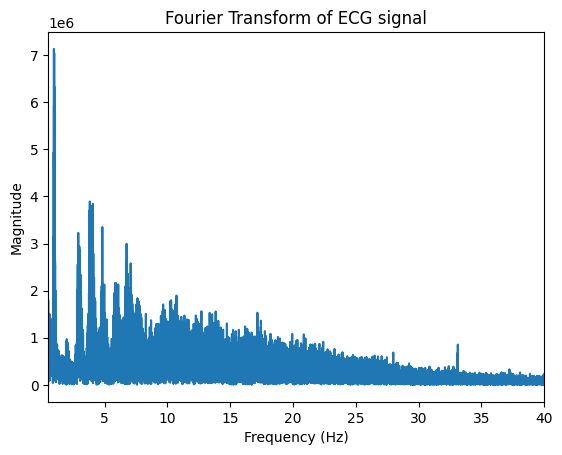

In [3]:
# Compute the Fourier Transform of the ECG signal
ECG_dft = np.fft.rfft(ECG_sig)

# Calculate the magnitude of the Fourier Transform
ECG_mag = np.abs(ECG_dft)

# Calculate the frequency axis
freqs = np.fft.rfftfreq(len(ECG_sig), d=1/800)

# Discard the frequencies below 0.5 Hz and above 40 Hz
ECG_mag[(freqs < 0.5)] = 0
ECG_mag[(freqs > 40)] = 0

# Plot the magnitude of the Fourier Transform
plt.figure()
plt.plot(freqs, ECG_mag)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of ECG signal')
plt.xlim([0.5, 40])
plt.show()

# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

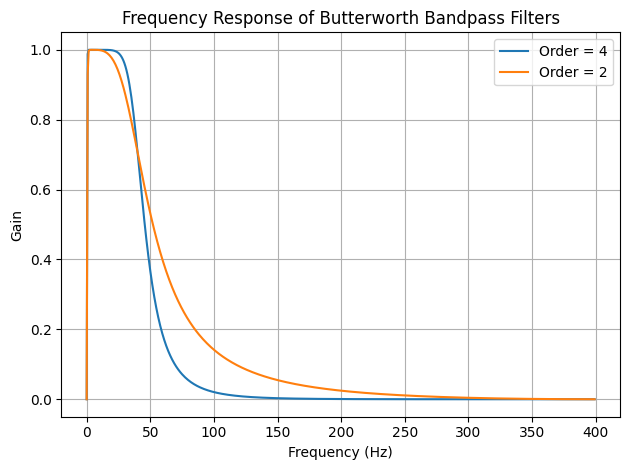

In [4]:
# Import the necessary functions
from scipy.signal import butter, freqz

# Define the Butterworth bandpass filter of order 4
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


# Function to plot the frequency response of the filter
def plot_frequency_response(lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label=f"Order = {order}")

# Sampling frequency
fs = 800.0
# Cutoff frequencies
lowcut = 0.5
highcut = 40.0

plt.figure()
plot_frequency_response(lowcut, highcut, fs, order=4)
plot_frequency_response(lowcut, highcut, fs, order=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response of Butterworth Bandpass Filters')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Observations:
- When we use a filter order of 4, we get a much steeper roll-off, meaning the filter attenuates frequencies outside the passband more sharply. However, it should be remembered that the gain will not drop to absolute zero.

- On the other hand, when using a filter order of 2, the gain drops more gradually. This means that it allows more signals to pass through even at frequencies outside the desired passband.

- In practice, this means that with a higher filter order, the filter blocks more unwanted frequencies but may introduce more phase distortion and computational complexity. Conversely, a lower filter order results in a smoother transition but allows more unwanted frequencies to pass through.


# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

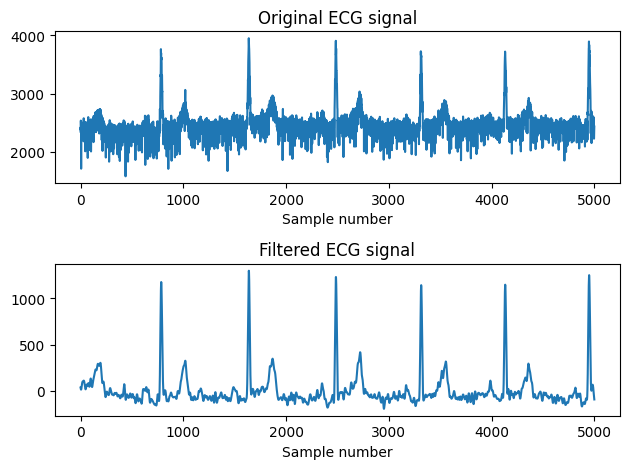

In [5]:
# Apply the 4th order filter to ECG_sig
b, a = butter_bandpass(lowcut, highcut, fs, order=4)
ECG_filtered = sp.signal.filtfilt(b, a, ECG_sig)

# Plot the first 5000 samples from the original and filtered ECG signals
plt.figure()

# Plot the original ECG signal
plt.subplot(2, 1, 1)
plt.plot(ECG_sig[:5000], label='Original ECG signal')
plt.xlabel('Sample number')
plt.title('Original ECG signal')

# Plot the filtered ECG signal
plt.subplot(2, 1, 2)
plt.plot(ECG_filtered[:5000], label='Filtered ECG signal')
plt.xlabel('Sample number')
plt.title('Filtered ECG signal')

# Display the plots
plt.tight_layout()
plt.show()

## Observations:

- When looking at the original signal between 0-5000, it can be seen that the ECG signal contains a lot of noise, which makes it much more challenging to detect details than in the filtered signal.

- The filtered ECG signal has much less noise, and both the spikes and the signal itself are much smoother.

- The filtered ECG signal shows all the important steps and allows more accurate analysis of the signal. For example, the QRS phase and the T phase are also quite easy to see from the original signal, but the P phase is sometimes a little difficult to identify.

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

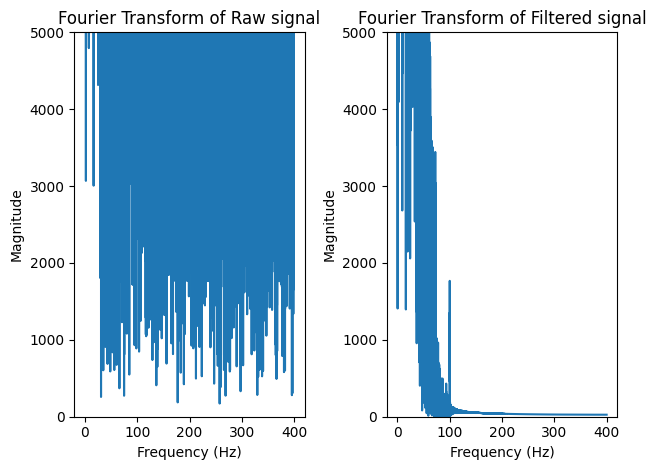

In [6]:
# Convert the raw and filtered signals in the frequency domain
ECG_dft = np.fft.rfft(ECG_sig)
ECG_filtered_dft = np.fft.rfft(ECG_filtered)

# Define frequency
freqs = np.fft.rfftfreq(len(ECG_sig), d=1/800)

# Plot the frequency spectrum and limit the x-axis between 0 and 50 Hz
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(freqs, np.abs(ECG_dft), label='Original ECG signal')

# Label and limit the axes
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Raw signal')
plt.ylim(0, 5000)

plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(ECG_filtered_dft), label='Filtered ECG signal')

# Label and limit the axes
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Filtered signal')
plt.ylim(0, 5000)

# Display the plots
plt.tight_layout()
plt.show()

## Observations:

- The raw signal often contains more noise, which can obscure the true variations in the signal. It can cause the signal appear more uniform and less variable because noise components mask the underlying features.

- When signal is filtered, the noise has reduced, which allows the true variations in the ECG signal to be more visible.

- As can be seen from the raw signal graph, even at high frequencies there are many values that are usually just noise. After filtering, the noise is reduced and the values decrease at higher frequencies, which means that all the important peaks in the ECG signal are much easier to see.

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


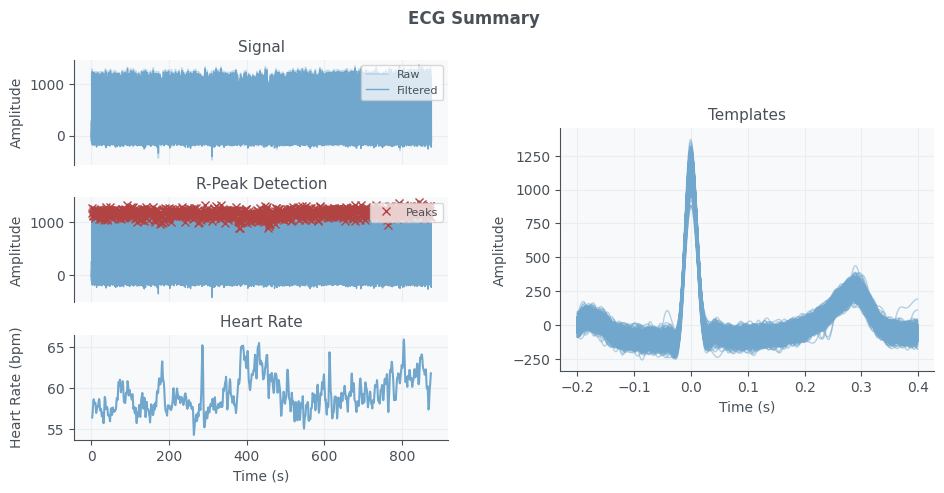

In [7]:
import biosppy 
from biosppy.signals import ecg 

# Detect QRS complexes by using Hamilton method and plot the results
ECG_filtered = ECG_filtered[:800000]
out = ecg.ecg(signal=ECG_filtered, sampling_rate=800, show=True)

## Observations:

- BioSSPy gives us four interesting graphs that show the signal itself, R-peak detection, heart rate and also all the patterns of the ECG phases.

- The signal itself looks right, and at high values it looks confusing, but that's because there are 800,000 samples.

- The R-peak detection captures well all QRS phases.

- Interestingly, the heartbeats are below reference values. Only 55-66 beats per minute, which should not be that low unless the patient is asleep during the measurement. It is also possible that the patient is athletic or very calm. The reference values of heart rate is approximately from 60 to 100 (1).

- If we look at the graphs, we see that the P phase, QRS phase and T phase are clearly visible. To get more accurate information from the ECG patterns, we should take a much smaller part of the signal for analysis.

# References:

(1): Kannel WB, Kannel C, Paffenbarger RS Jr, Cupples LA. Heart rate and cardiovascular mortality: the Framingham Study. Am Heart J. 1987 Jun;113(6):1489-94. doi: 10.1016/0002-8703(87)90666-1. PMID: 3591616.